In [2]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import squarify
import requests
import networkx as nx
from matplotlib.sankey import Sankey

In [1]:
data11 = pd.read_csv('filtered_dataframe.csv')
data11

NameError: name 'pd' is not defined

In [ ]:
data11 = pd.read_csv('filtered_dataframe.csv')
data11 = data11[(data11['Number'] != 0)&
                (data11['Region of HE provider'] != 'Total United Kingdom') &
            (data11['Level of study'] != 'All postgraduate')]

countries11 = ['England', 'Scotland', 'Wales', 'Northern Ireland']
country_data11 = data11[data11['Region of HE provider'].isin(countries11)]
region_data11 = data11[~data11['Region of HE provider'].isin(countries11)]

result_df = region_data11.groupby(by=['Domicile',
                                       'Level of study',
                                       'Mode of study',
                                       'Region of HE provider'
                                       ], as_index=False).agg({'Number': "sum"})

def create_treemap(df, path_columns, value_column):
    fig = px.treemap(df, path=path_columns, values=value_column)
    fig.update_layout(title="Treemap of Higher Education Providers by Region, Study Level, Study Mode, and Domicile",
                  width=1000, height=700,)
    fig.show()

create_treemap(result_df, ['Region of HE provider','Level of study','Mode of study','Domicile'], 'Number')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
result_df2 = country_data11.groupby(by=['Domicile',
                                       'Level of study',
                                       'Mode of study',
                                       'Region of HE provider'
                                       ], as_index=False).agg({'Number': "sum"})

def create_treemap(df, path_columns, value_column):
    fig = px.treemap(df, path=path_columns, values=value_column)
    fig.show()

create_treemap(result_df2, ['Region of HE provider','Level of study','Mode of study','Domicile'], 'Number')

In [ ]:
# Prepare data for Sankey diagram
source = []
target = []
value = []

# Aggregate data by domicile, region, and level of study
domicile_region_study_data = country_data11.groupby(['Academic Year','Domicile', 'Region of HE provider', 'Level of study'])['Number'].sum().reset_index()
domicile_region_study_data = domicile_region_study_data.sort_values('Number', ascending=False)
domicile_region_study_data


,Academic Year,Domicile,Region of HE provider,Level of study,Number
20810,2021/22,Greater London,England,First degree,576690
17956,2020/21,Greater London,England,First degree,551800
15101,2019/20,Greater London,England,First degree,500050
12259,2018/19,Greater London,England,First degree,487140
9415,2017/18,Greater London,England,First degree,474940
...,...,...,...,...,...
16402,2019/20,Southend-on-Sea,Wales,Postgraduate (research),10
19468,2020/21,Trinidad and Tobago,Scotland,Postgraduate (research),10
10768,2017/18,Sudan,Scotland,First degree,10
19470,2020/21,Trinidad and Tobago,Wales,First degree,10


In [ ]:
filter_values = ['Greater London', 'Kent', 'Hertfordshire','Essex','Surrey','Hempshire','Merseyside']
domicile_region_study_data = domicile_region_study_data[domicile_region_study_data['Domicile'].isin(filter_values)]

academic_years = list(domicile_region_study_data['Academic Year'].unique())
domiciles = list(domicile_region_study_data['Domicile'].unique())
regions = list(domicile_region_study_data['Region of HE provider'].unique())
levels_of_study = list(domicile_region_study_data['Level of study'].unique())
all_nodes = academic_years + domiciles + regions + levels_of_study

# Create mapping for nodes
node_mapping = {node: i for i, node in enumerate(all_nodes)}

for _, row in domicile_region_study_data.iterrows():
    source.append(node_mapping[row['Academic Year']])
    target.append(node_mapping[row['Domicile']])
    value.append(row['Number'])

# Create source, target, and value lists
for _, row in domicile_region_study_data.iterrows():
    source.append(node_mapping[row['Domicile']])
    target.append(node_mapping[row['Region of HE provider']])
    value.append(row['Number'])

# Append additional links from region to level of study
for _, row in domicile_region_study_data.iterrows():
    source.append(node_mapping[row['Region of HE provider']])
    target.append(node_mapping[row['Level of study']])
    value.append(row['Number'])



# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Sankey Diagram of Student Numbers by Academic Year, Domicile, Region, Level of Study and Mode of Study", font_size=10)
fig.show()

In [ ]:

# Create source and target indices


In [ ]:
data = pd.read_csv("egitim.csv")
data = data[(data['Level of study'] != 'All') &
                     (data['Level of study'] != 'All undergraduate') &
                     (data['Level of study'] != 'All postgraduate') &
                     #(data['Level of study'] != 'Other undergraduate') &
                     (data['Mode of study'] != 'All') &
                     (data['Region of HE provider'] != 'Total United Kingdom')]

countries = ['England', 'Scotland', 'Wales', 'Northern Ireland']
country_data = data[data['Region of HE provider'].isin(countries)]
region_data = data[~data['Region of HE provider'].isin(countries)]


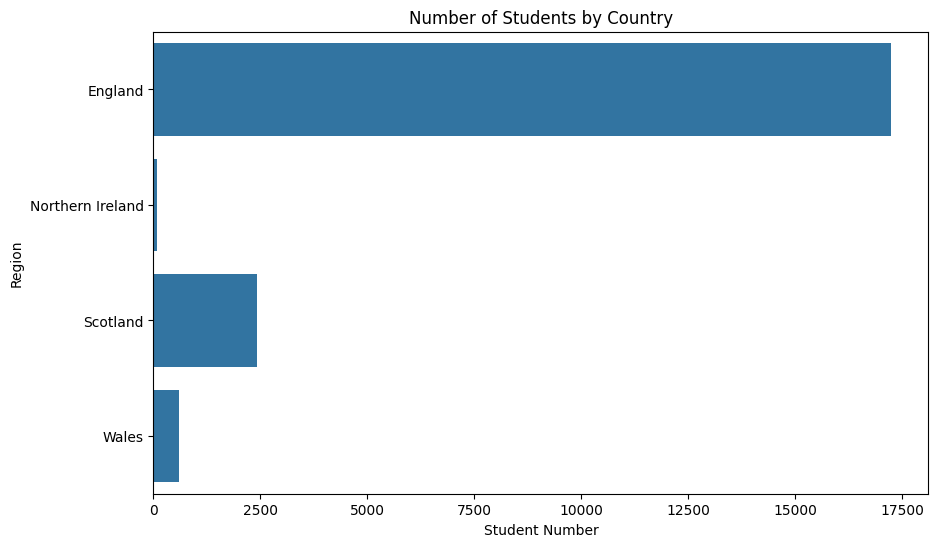

In [ ]:
region_data1 = country_data.groupby('Region of HE provider')['Number'].sum().reset_index()


plt.figure(figsize=(10,6))
sns.barplot(x='Number', y='Region of HE provider', data=region_data1)
plt.title('Number of Students by Country')
plt.xlabel('Student Number')
plt.ylabel('Region')
plt.show()


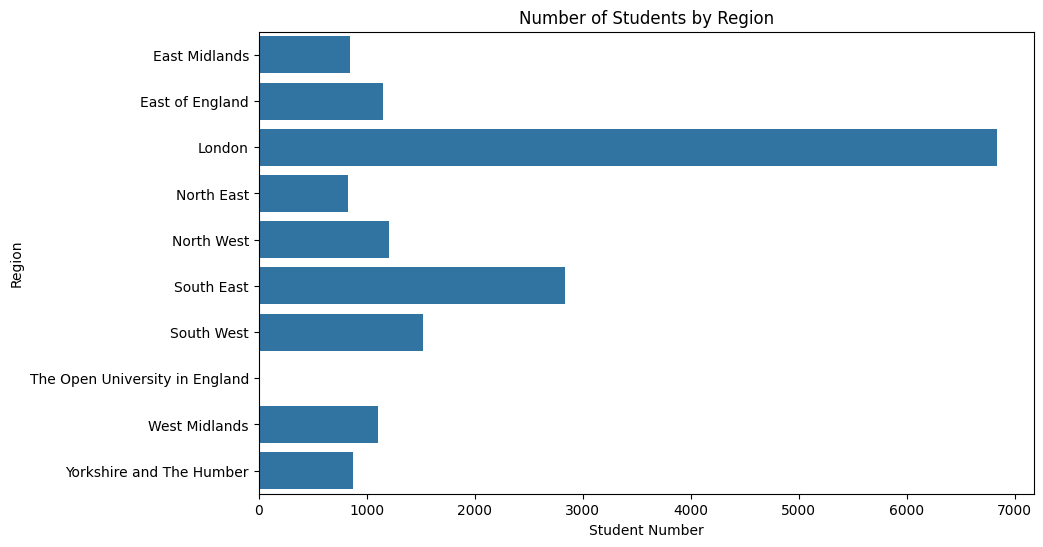

In [ ]:
region_data2 = region_data.groupby('Region of HE provider')['Number'].sum().reset_index()


plt.figure(figsize=(10,6))
sns.barplot(x='Number', y='Region of HE provider', data=region_data2)
plt.title('Number of Students by Region')
plt.xlabel('Student Number')
plt.ylabel('Region')
plt.show()



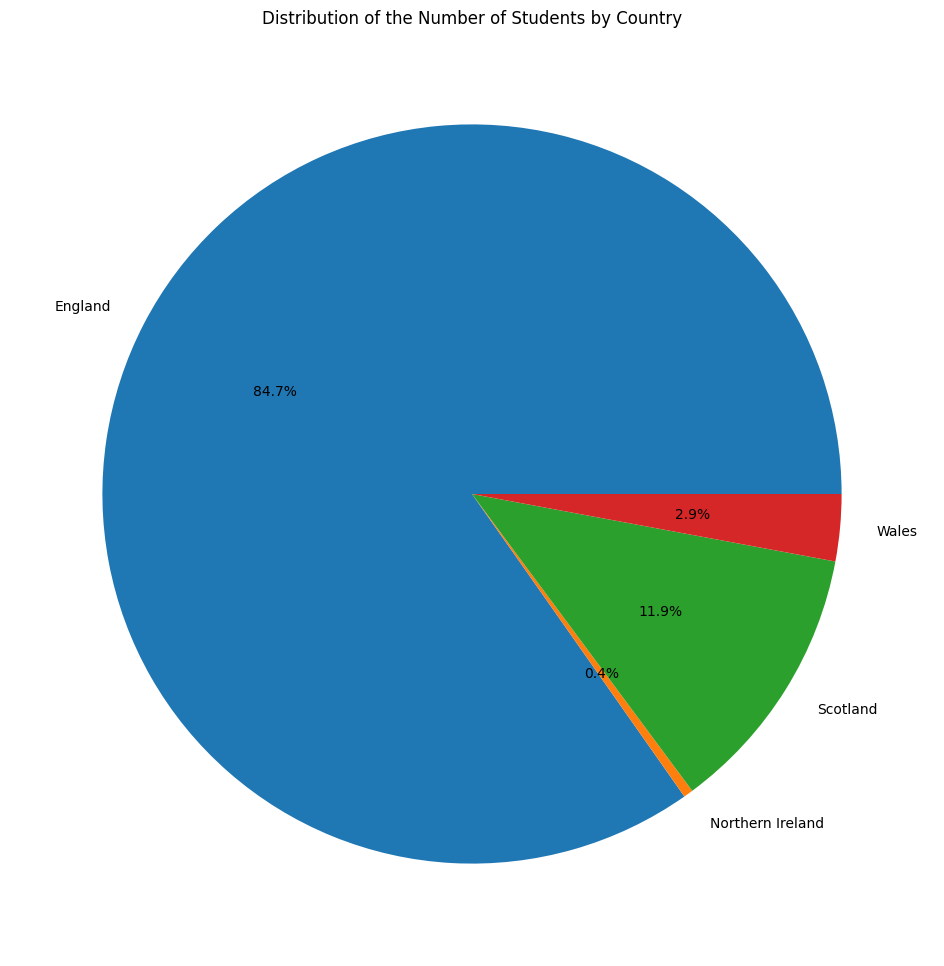

In [ ]:
pie_data1 = country_data.groupby('Region of HE provider')['Number'].sum()
pie_data1


plt.figure(figsize=(12,12))
pie_data1.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of the Number of Students by Country')
plt.ylabel('')
plt.show()

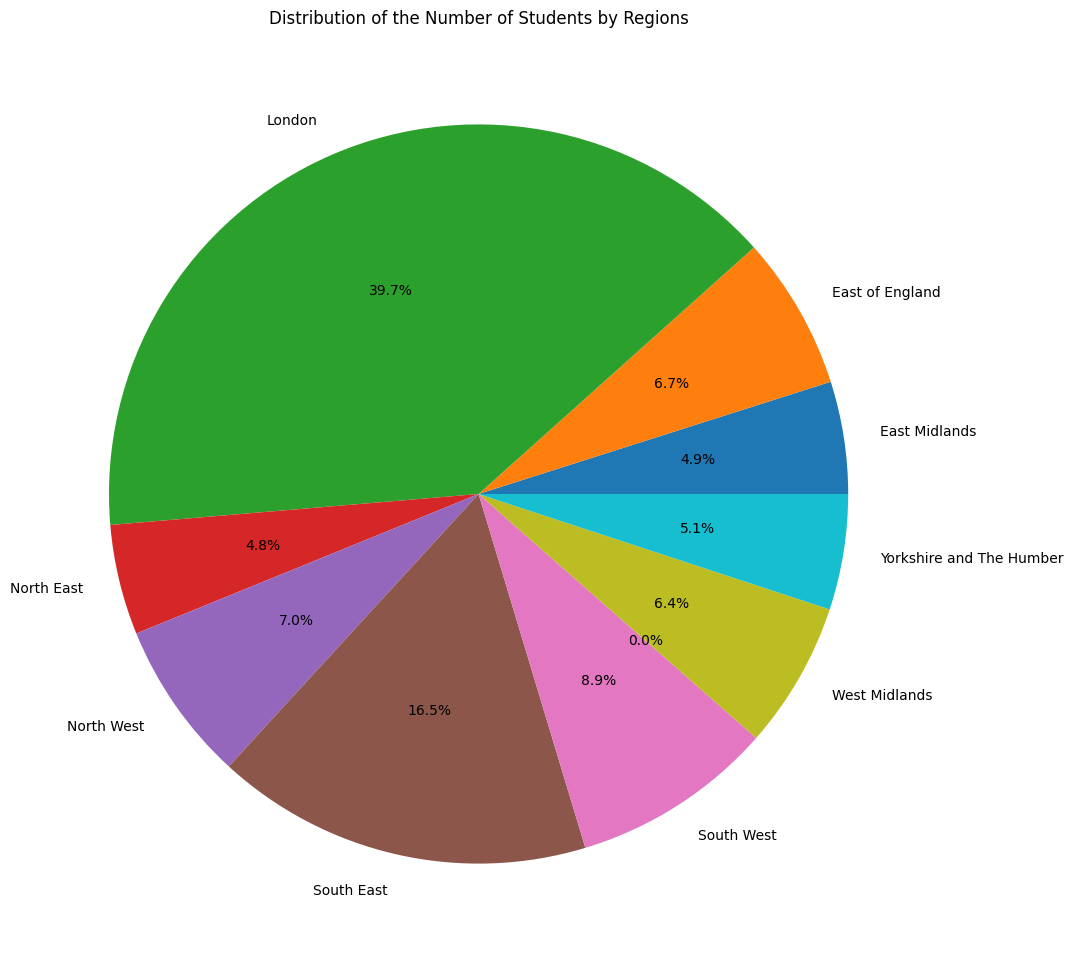

In [ ]:
pie_data2 = region_data.groupby('Region of HE provider')['Number'].sum()


plt.figure(figsize=(12,12))
pie_data2.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of the Number of Students by Regions')
plt.ylabel('')
plt.show()

In [ ]:
result_df = data.groupby(by=['Domicile',
                                       'Level of study'
                                       ], as_index=False).agg({'Number': "sum"})

def create_treemap(df, path_columns, value_column):
    """
    Verilen DataFrame'den Treemap oluşturur.

    Parameters:
    df (pd.DataFrame): Veri DataFrame'i
    path_columns (list): Treemap için kullanılacak kolonların listesi
    value_column (str): Değer kolonunun adı

    Returns:
    plotly.graph_objects.Figure: Treemap grafiği
    """
    fig = px.treemap(df, path=path_columns, values=value_column)
    fig.show()

create_treemap(result_df, ['Domicile', 'Level of study'], 'Number')


In [ ]:
result_df2 = country_data.groupby(by=['Level of study',
                                       'Region of HE provider'
                                       ], as_index=False).agg({'Number': "sum"})

fig = go.Figure(data=go.Scatter3d(
x=result_df2['Level of study'],
y=result_df2['Region of HE provider'],
z=result_df2['Number'],
text=result_df2['Region of HE provider'],
mode='markers',
marker=dict(
sizemode='diameter',
sizeref=25,
size=result_df2['Number'],
color = result_df2['Number'],
colorscale = 'Viridis',
colorbar_title = 'Number',
line_color='rgb(140, 140, 170)'
)
))
fig.update_layout(height=800, width=800,
title='Level of study by Region of HE provider')
fig.show()

In [ ]:
address = {'Bulgaria': 'BGR', 'Turkey': 'TUR',
           'Greece': 'GRC',
           'Russia': 'RUS', 'Ukraine': 'UKR'}
data["ISO"] = data["Domicile"].map(address)

df_countries = data.groupby(['Domicile',"ISO"],
                               as_index=False).agg({'Number': "sum"})
df_countries.sort_values('Number', ascending=False)


,Domicile,ISO,Number
1,Greece,GRC,12940
3,Turkey,TUR,9395
0,Bulgaria,BGR,7165
2,Russia,RUS,6330
4,Ukraine,UKR,1730


In [ ]:
world_map = px.choropleth(df_countries,
                          locations="ISO",
                          color='Number',
                          hover_name='Domicile',
                          color_continuous_scale="sunsetdark"
                          title='Number of Students by Country'
                          )

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

In [ ]:
country_city_org = country_data.groupby(by=['Domicile',
                                       'Region of HE provider'
                                       ], as_index=False).agg({'Number': "sum"})

country_city_org = country_city_org.sort_values('Number', ascending=False)
country_city_org

,Domicile,Region of HE provider,Number
4,Greece,England,5845
12,Turkey,England,4420
0,Bulgaria,England,3170
8,Russia,England,2990
6,Greece,Scotland,950
16,Ukraine,England,820
2,Bulgaria,Scotland,685
14,Turkey,Scotland,400
10,Russia,Scotland,305
7,Greece,Wales,275


In [ ]:
burst = px.sunburst(country_city_org,
                    path=['Domicile', 'Region of HE provider'],
                    values="Number",
                    title='Number by Domicile and Region of HE provider ?',
                    color = "Domicile"
                   )

burst.update_layout(xaxis_title='Number',
                    yaxis_title='Region of HE provider',
                    coloraxis_showscale=True)

burst.show()

In [ ]:
dtaa = region_data.groupby(by=['Region of HE provider',
                                       'Mode of study'
                                       ], as_index=False).agg({'Number': "sum"})

dtaa = dtaa.sort_values('Number', ascending=False)
dtaa

,Region of HE provider,Mode of study,Number
4,London,Full-time,6375
10,South East,Full-time,2680
12,South West,Full-time,1445
8,North West,Full-time,1130
2,East of England,Full-time,1085
16,West Midlands,Full-time,1005
0,East Midlands,Full-time,810
18,Yorkshire and The Humber,Full-time,800
6,North East,Full-time,790
5,London,Part-time,460


In [ ]:
v_bar_split = px.bar(x = dtaa["Number"],
                     y = dtaa["Mode of study"],
                     color = dtaa["Region of HE provider"],
                     title='Number per Mode of study split by Transaction Years',
                     text=dtaa["Region of HE provider"])

v_bar_split.update_layout(xaxis_title='Number',
                          yaxis_title='Mode of study',
                          )
v_bar_split.show()

In [ ]:
dtaa21 = data.groupby(by=['Mode of study',
                                       'Level of study'
                                       ], as_index=False).agg({'Number': "sum"})
dtaa21

,Mode of study,Level of study,Number
0,Full-time,First degree,22950
1,Full-time,Other undergraduate,505
2,Full-time,Postgraduate (research),4025
3,Full-time,Postgraduate (taught),7600
4,Part-time,First degree,545
5,Part-time,Other undergraduate,175
6,Part-time,Postgraduate (research),380
7,Part-time,Postgraduate (taught),1380


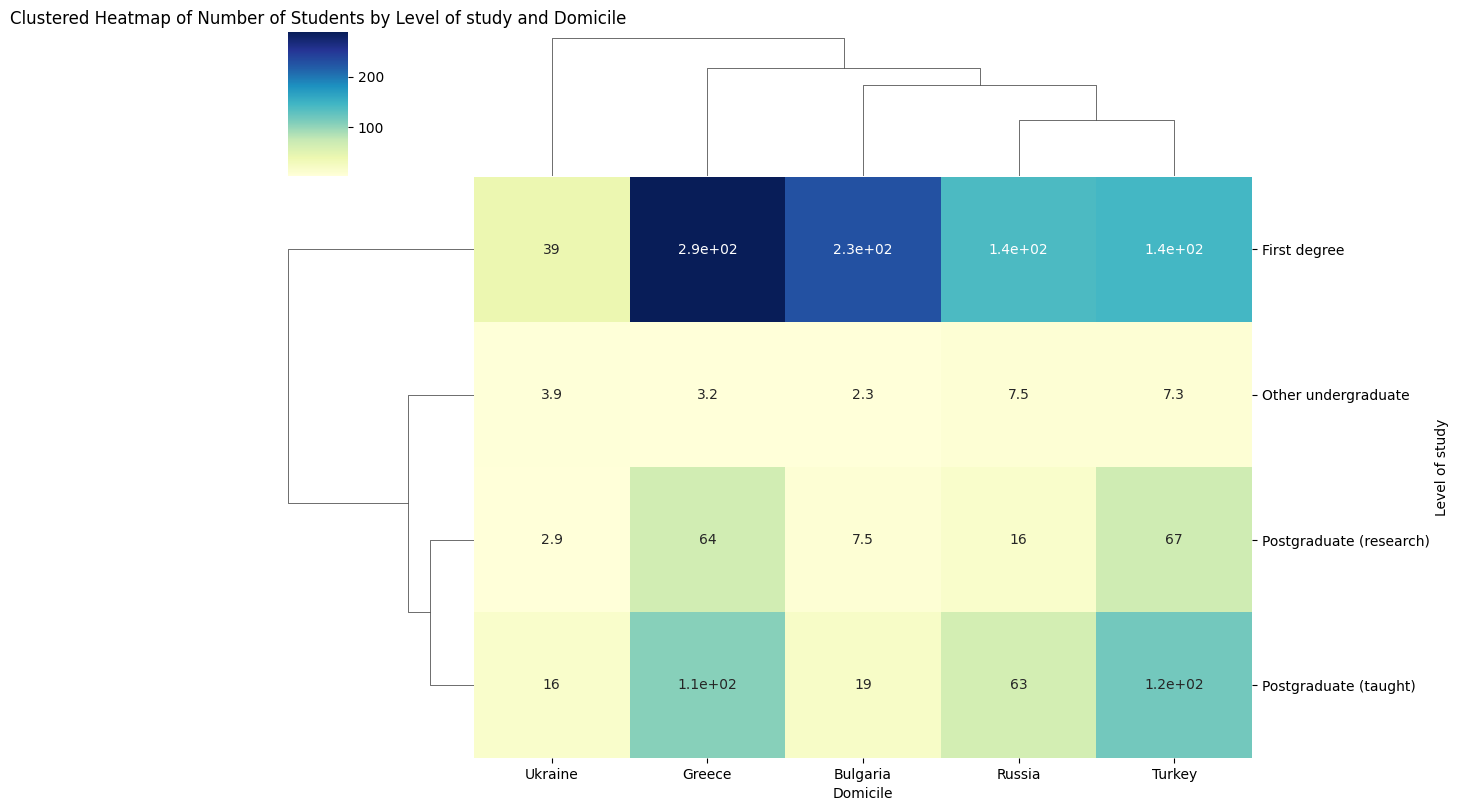

In [ ]:
heatmap_data = data.pivot_table(values='Number', index='Level of study', columns='Domicile')

sns.clustermap(heatmap_data, cmap='YlGnBu', annot=True, figsize=(12,8))
plt.title('Clustered Heatmap of Number of Students by Level of study and Domicile')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



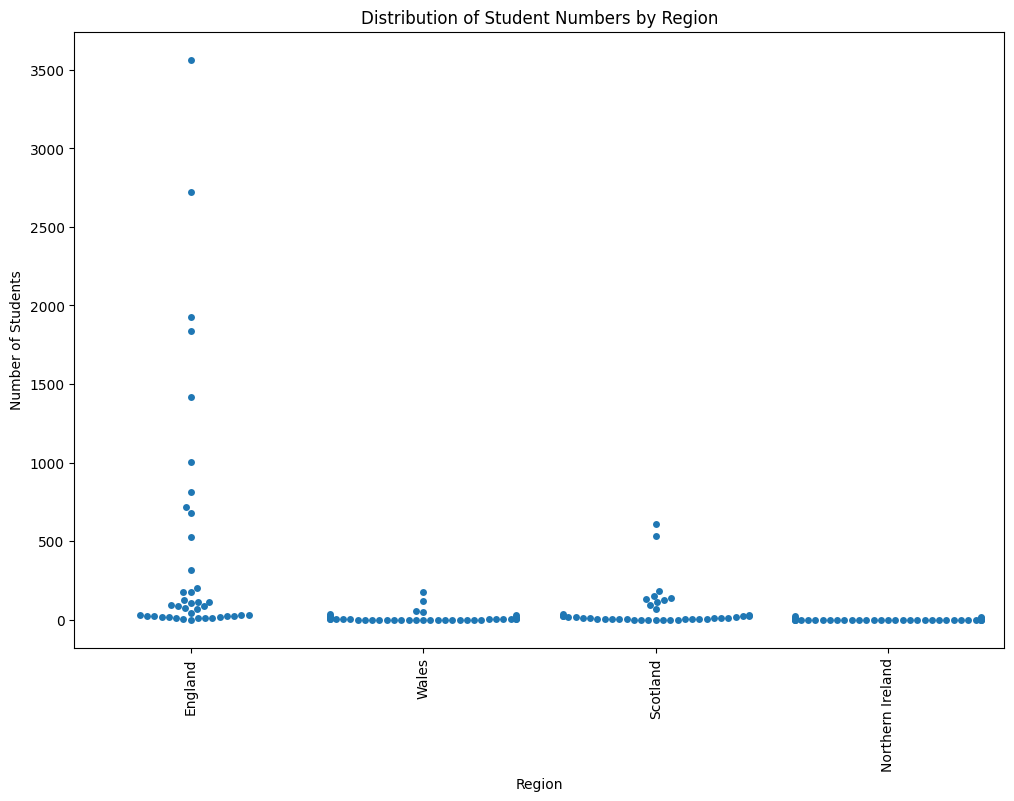

In [ ]:
#Swarm Plot
plt.figure(figsize=(12,8))
sns.swarmplot(x='Region of HE provider', y='Number', data=country_data)
plt.title('Distribution of Student Numbers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Students')
plt.xticks(rotation=90)
plt.show()

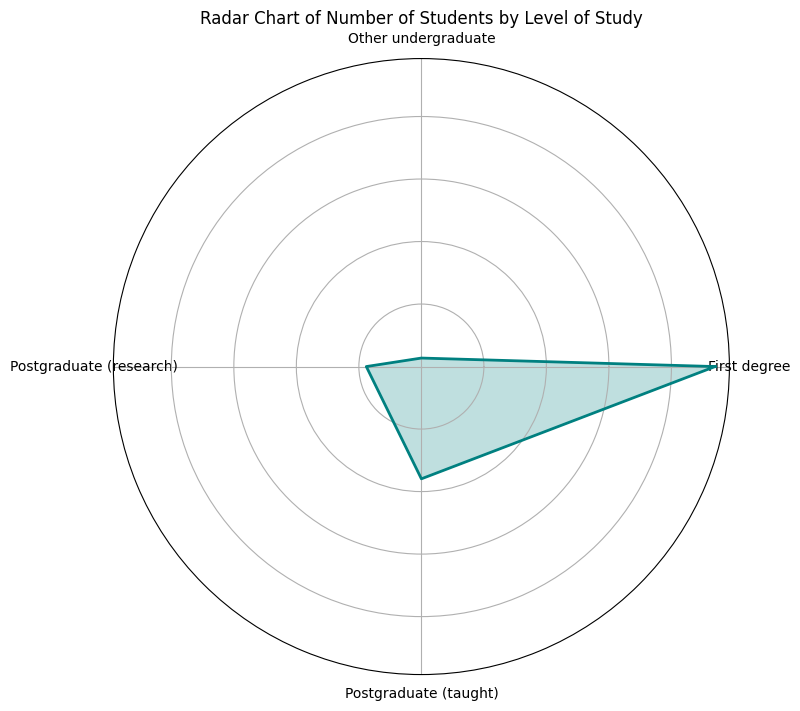

In [ ]:
# Prepare data for radar chart
radar_data = data.groupby('Level of study')['Number'].sum().reset_index()
categories = radar_data['Level of study'].tolist()
values = radar_data['Number'].tolist()

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='teal', alpha=0.25)
ax.plot(angles, values, color='teal', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Chart of Number of Students by Level of Study')
plt.show()


In [ ]:
countries = ['England', 'Scotland', 'Wales', 'Northern Ireland']
country_data = data[data['Region of HE provider'].isin(countries)]
region_data = data[~data['Region of HE provider'].isin(countries)]
# Prepare data for Sankey diagram
source = []
target = []
value = []

# Aggregate data by region and domicile
region_domicile_data = region_data.groupby(['Domicile', 'Region of HE provider'])['Number'].sum().reset_index()

# Create source and target indices
regions = list(region_domicile_data['Domicile'].unique())
domiciles = list(region_domicile_data['Region of HE provider'].unique())
all_nodes = regions + domiciles

# Create mapping for nodes
node_mapping = {node: i for i, node in enumerate(all_nodes)}

# Create source, target, and value lists
for _, row in region_domicile_data.iterrows():
    source.append(node_mapping[row['Domicile']])
    target.append(node_mapping[row['Region of HE provider']])
    value.append(row['Number'])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="pink", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Sankey Diagram of Student Numbers by Region and Domicile", font_size=10)
fig.show()

In [ ]:
countries = ['England', 'Scotland', 'Wales', 'Northern Ireland']
country_data = data[data['Region of HE provider'].isin(countries)]
region_data = data[~data['Region of HE provider'].isin(countries)]
# Prepare data for Sankey diagram
source = []
target = []
value = []

# Aggregate data by region and domicile
country_domicile_data = country_data.groupby(['Domicile', 'Region of HE provider'])['Number'].sum().reset_index()

# Create source and target indices
regions = list(country_domicile_data['Domicile'].unique())
domiciles = list(country_domicile_data['Region of HE provider'].unique())
all_nodes = regions + domiciles

# Create mapping for nodes
node_mapping = {node: i for i, node in enumerate(all_nodes)}

# Create source, target, and value lists
for _, row in country_domicile_data.iterrows():
    source.append(node_mapping[row['Domicile']])
    target.append(node_mapping[row['Region of HE provider']])
    value.append(row['Number'])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Sankey Diagram of Student Numbers by Country and Domicile", font_size=10)
fig.show()

In [ ]:
filtered_data = region_data
#filtered_data = data[(data['Region of HE provider'] != 'Total United Kingdom') & (data['Mode of study'] != 'All')]
# Prepare data for Sankey diagram
# Separate regions
region_data = filtered_data[~filtered_data['Region of HE provider'].isin(['England', 'Scotland', 'Wales', 'Northern Ireland'])]

# Prepare data for Sankey diagram
source = []
target = []
value = []

# Aggregate data by domicile, region, and level of study
domicile_region_study_data = region_data.groupby(['Domicile', 'Region of HE provider', 'Level of study'])['Number'].sum().reset_index()

# Create source and target indices
domiciles = list(domicile_region_study_data['Domicile'].unique())
regions = list(domicile_region_study_data['Region of HE provider'].unique())
levels_of_study = list(domicile_region_study_data['Level of study'].unique())
all_nodes = domiciles + regions + levels_of_study

# Create mapping for nodes
node_mapping = {node: i for i, node in enumerate(all_nodes)}

# Create source, target, and value lists
for _, row in domicile_region_study_data.iterrows():
    source.append(node_mapping[row['Domicile']])
    target.append(node_mapping[row['Region of HE provider']])
    value.append(row['Number'])

# Append additional links from region to level of study
for _, row in domicile_region_study_data.iterrows():
    source.append(node_mapping[row['Region of HE provider']])
    target.append(node_mapping[row['Level of study']])
    value.append(row['Number'])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Sankey Diagram of Student Numbers by Domicile, Region, and Level of Study", font_size=10)
fig.show()

NameError: name 'region_data' is not defined

In [ ]:
filtered_data = country_data
#filtered_data = data[(data['Region of HE provider'] != 'Total United Kingdom') & (data['Mode of study'] != 'All')]
# Prepare data for Sankey diagram
# Aggregate data by domicile and region
domicile_region_agg = filtered_data.groupby(['Domicile', 'Region of HE provider'])['Number'].sum().reset_index()

# Aggregate data by region and level of study
region_study_agg = filtered_data.groupby(['Region of HE provider', 'Level of study'])['Number'].sum().reset_index()

# Create source and target indices
domiciles = list(domicile_region_agg['Domicile'].unique())
regions = list(filtered_data['Region of HE provider'].unique())
levels_of_study = list(region_study_agg['Level of study'].unique())
all_nodes = domiciles + regions + levels_of_study

# Create mapping for nodes
node_mapping = {node: i for i, node in enumerate(all_nodes)}

# Prepare data for Sankey diagram
source = []
target = []
value = []

# Create source, target, and value lists for domicile to region
for _, row in domicile_region_agg.iterrows():
    source.append(node_mapping[row['Domicile']])
    target.append(node_mapping[row['Region of HE provider']])
    value.append(row['Number'])

# Create source, target, and value lists for region to level of study
for _, row in region_study_agg.iterrows():
    source.append(node_mapping[row['Region of HE provider']])
    target.append(node_mapping[row['Level of study']])
    value.append(row['Number'])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(title_text="Sankey Diagram of Student Numbers by Domicile, Country, and Level of Study", font_size=10)
fig.show()

In [ ]:
result_df2 = data.groupby(by=['Domicile',
                                       'Level of study'
                                       ], as_index=False).agg({'Number': "sum"})

def create_treemap(df, path_columns, value_column):

    fig = px.treemap(df, path=path_columns, values=value_column)
    fig.show()

create_treemap(result_df, ['Domicile', 'Level of study'], 'Number')

In [ ]:
result_df2 = region_data.groupby(by=['Domicile',
                                       'Region of HE provider'
                                       ], as_index=False).agg({'Number': "sum"})

def create_treemap(df, path_columns, value_column):

    fig = px.treemap(df, path=path_columns, values=value_column, title='Number of Regions by Domicile')
    fig.show()

create_treemap(result_df2, ['Domicile', 'Region of HE provider'], 'Number')

In [ ]:
result_df2 = region_data.groupby(by=['Region of HE provider',
                                       'Level of study'
                                       ], as_index=False).agg({'Number': "sum"})

def create_treemap(df, path_columns, value_column):

    fig = px.treemap(df, path=path_columns, values=value_column, title='Number of Level of study by Regions')
    fig.show()

create_treemap(result_df2, ['Region of HE provider', 'Level of study'], 'Number')

In [ ]:
import pandas as pd
import plotly.express as px
import requests
import json
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setinizi yükleyin
data = pd.read_csv('egitim.csv')

# 'All' ve 'Total United Kingdom' değerlerini filtreleyin
filtered_data = data[(data['Level of study'] != 'All') &
                     (data['Mode of study'] != 'All') &
                     (data['Region of HE provider'] != 'All') &
                     (data['Region of HE provider'] != 'Total United Kingdom')]
filtered_data['Region of HE provider'] = filtered_data['Region of HE provider'].replace('East of England', 'Eastern')
filtered_data


<ipython-input-90-1b603bc98108>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,4 way domicile,Domicile,Level of study,Mode of study,Academic Year,Region of HE provider,Number
45,All,Bulgaria,Postgraduate (research),Full-time,2021/22,North East,5
46,All,Bulgaria,Postgraduate (research),Full-time,2021/22,North West,10
47,All,Bulgaria,Postgraduate (research),Full-time,2021/22,Yorkshire and The Humber,5
48,All,Bulgaria,Postgraduate (research),Full-time,2021/22,East Midlands,10
49,All,Bulgaria,Postgraduate (research),Full-time,2021/22,West Midlands,5
...,...,...,...,...,...,...,...
1554,All,Ukraine,All undergraduate,Part-time,2021/22,The Open University in England,0
1555,All,Ukraine,All undergraduate,Part-time,2021/22,England,15
1556,All,Ukraine,All undergraduate,Part-time,2021/22,Wales,0
1557,All,Ukraine,All undergraduate,Part-time,2021/22,Scotland,0


In [ ]:
# İngiltere'nin bölgelerini seçin
england_regions = ['Eastern', 'East Midlands', 'London', 'North East', 'North West',
                   'South East', 'South West', 'West Midlands', 'Yorkshire and The Humber']

# İngiltere bölgelerine ait verileri filtreleyin
england_data = filtered_data[filtered_data['Region of HE provider'].isin(england_regions)]

# 'Region of HE provider' ve 'Domicile' sayılarını gruplandırın
region_domicile_agg = england_data.groupby('Region of HE provider')['Number'].sum().reset_index()
region_domicile_agg

,Region of HE provider,Number
0,East Midlands,1705
1,Eastern,2325
2,London,13655
3,North East,1680
4,North West,2420
5,South East,5680
6,South West,3050
7,West Midlands,2215
8,Yorkshire and The Humber,1740


In [ ]:

# Harita üzerinde İngiltere'nin bölgelerini gösterme
fig = px.choropleth(region_domicile_agg,
                    geojson=geojson_data,
                    featureidkey='properties.NAME',
                    locations='Region of HE provider',
                    color='Number',
                    hover_name='Region of HE provider',
                    hover_data=['Number'],
                    title='Student Numbers by Region in England')

fig.update_geos(fitbounds="locations", visible=False)
fig.show()

